<a href="https://colab.research.google.com/github/sethumj/review-analysis/blob/main/685_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members = [Sethu Mettukulam Jagadeesan, Jayasri Duggina, Jashwanth Jampala]

In [ ]:
!pip install transformers
import re
import nltk
import nltk.corpus
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
nltk.download('stopwords')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Final_Data -- This csv file contains three targets (Positive, Negative, Bugs)

Final_Data_PN -- This csv file contains two targets (Positive, Negative)

The code written is generic to support both the files this is done to reduce the code redundancy. For testing replace the file you want to train upon.

Make sure to upload these files before executing.

In [ ]:
labelled_data = pd.read_csv("Final_data_PN.csv")
labelled_data = labelled_data.dropna()
comments = labelled_data['comment']
filtered_comments = []

In [ ]:
def preprocess(data):
  processed_text=[]
  for text in data:
    text = str(text)
    #to lowercase
    text = text.lower()
    #eliminate the punctuation, URL, and @
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    #remove the stop words
    stop = stopwords.words('english')
    text = " ".join([word for word in text.split() if word not in (stop)])
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    l_text =""
    for word in text.split():
      l_text+=" "+lemmatizer.lemmatize(word)
    #print(l_text)
    processed_text.append(l_text)
  return processed_text

Decision Tree using Bag of words approach

In [ ]:
filtered_comments = preprocess(comments)
vectorizer = CountVectorizer()
docs = np.array(filtered_comments)
# Fit the bag-of-words model
bag = vectorizer.fit_transform(docs)
# Get unique words / tokens found in all the documents. The unique words / tokens represents the features
print(vectorizer.get_feature_names_out())
# Associate the indices with each unique word
print(vectorizer.vocabulary_)
# Print the numerical feature vector
print(len(bag.toarray()))

['001jpg' '00am' '01011970' ... 'zooming' 'zoomtext' 'zwelethu']
{'wow': 8273, 'infuriating': 3867, 'experience': 2779, 'trying': 7614, 'reset': 6177, 'linkedin': 4313, 'password': 5275, 'took': 7485, 'whopping': 8186, '50': 244, 'minute': 4657, 'valuable': 7938, 'time': 7426, 'end': 2588, 'emptyhanded': 2572, 'without': 8223, 'complete': 1698, 'waste': 8098, 'mean': 4549, 'seriously': 6573, 'hard': 3479, 'provide': 5727, 'straightforward': 7047, 'efficient': 2521, 'recovery': 5941, 'process': 5668, 'instead': 3916, 'forced': 3088, 'jump': 4095, 'countless': 1889, 'hoop': 3619, 'navigate': 4827, 'maze': 4545, 'confusing': 1752, 'option': 5124, 'deal': 2039, 'endless': 2593, 'redirects': 5965, 'absolute': 358, 'nightmare': 4903, 'many': 4497, 'cant': 1342, 'tap': 7250, 'show': 6662, 'comment': 1650, 'doesnt': 2354, 'anything': 671, 'didnt': 2213, 'load': 4348, 'full': 3199, 'text': 7326, 'especially': 2675, 'prevalent': 5622, 'low': 4423, 'connectivity': 1764, 'area': 757, 'messaging': 

In [ ]:
X = bag.toarray()
y = np.array(list(labelled_data['target']))

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=38,random_state = 35)
clf = clf.fit(X_train,y_train)
clf1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=40)
clf1 = clf1.fit(X_train,y_train)
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X_train,y_train)

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

In [ ]:
print(clf.predict(X_test))
print("Performance on test data: ", clf.score(X_test, y_test))
print(clf1.predict(X_test))
print("Performance on test data: ", clf1.score(X_test, y_test))
print(clf2.predict(X_test))
print("Performance on test data: ", clf2.score(X_test, y_test))

[-1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1  1
  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1
  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1
  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1
 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1  1  1
  1  1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1
 -1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1 -1
 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1
  1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1
  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1
  1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1

Testing on Novel data

In [ ]:
raw_text = ["This application is remarkablly nice I like the interface and frequent updates that they give is very useful","Worst application that I have ever used ","this application has lots of issues with the interface they to fix it asap"]
def classify(raw_text):
  text = preprocess(raw_text)
  text =  vectorizer.transform(text).toarray()
  output = clf2.predict(text)
  for x in range(0, len(output)):
    if output[x] == 1:
      print(raw_text[x]," -->  Positive",)
    elif output[x] == -1:
      print(raw_text[x]," -->  Negative",)
    elif output[x] == 0:
      print(raw_text[x]," -->  Bug",)
classify(raw_text)
x = []
x.append(input("Enter your review : "))
classify(x)


This application is remarkablly nice I like the interface and frequent updates that they give is very useful  -->  Positive
Worst application that I have ever used   -->  Negative
this application has lots of issues with the interface they to fix it asap  -->  Bug
Enter your review : I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap
I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap  -->  Bug


Decision Tree using TFIDF vectorizer

In [ ]:
# Read the data into a pandas DataFrame
data = pd.read_csv('Final_data_PN.csv')
data = data.dropna()

# Split the data into features and target
X = data['comment']
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)


# Create a decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', splitter='random',max_depth = 38,random_state=35)

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = classifier.predict(X_test_tfidf)
y_pred1 = classifier1.predict(X_test_tfidf)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)
report = classification_report(y_test, y_pred1)
print(report)
print("Performance on test data: ", classifier.score(X_test_tfidf, y_test))
print("Performance on test data: ", classifier1.score(X_test_tfidf, y_test))

              precision    recall  f1-score   support

          -1       0.77      0.82      0.79       335
           1       0.77      0.71      0.74       287

    accuracy                           0.77       622
   macro avg       0.77      0.77      0.77       622
weighted avg       0.77      0.77      0.77       622

              precision    recall  f1-score   support

          -1       0.80      0.70      0.75       335
           1       0.69      0.79      0.74       287

    accuracy                           0.74       622
   macro avg       0.75      0.75      0.74       622
weighted avg       0.75      0.74      0.74       622

Performance on test data:  0.770096463022508
Performance on test data:  0.7427652733118971


In [ ]:
raw_text = ["This application is remarkablly nice I like the interface and frequent updates that they give is very useful","Worst application that I have ever used","this application has lots of issues with the interface they to fix it asap"]
def classify(raw_text):
  text = preprocess(raw_text)
  text =  vectorizer.transform(text).toarray()
  output = classifier1.predict(text)
  for x in range(0, len(output)):
    if output[x] == 1:
      print(raw_text[x]," -->  Positive",)
    elif output[x] == -1:
      print(raw_text[x]," -->  Negative",)
    elif output[x] == 0:
      print(raw_text[x]," -->  Bug",)
classify(raw_text)
x = []
x.append(input("Enter your review : "))
classify(x)


This application is remarkablly nice I like the interface and frequent updates that they give is very useful  -->  Positive
Worst application that I have ever used  -->  Negative
this application has lots of issues with the interface they to fix it asap  -->  Negative
Enter your review : I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap
I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap  -->  Negative


Decision tree using WordtoVec

In [ ]:
from gensim.models import Word2Vec

# Load your dataset
data = pd.read_csv('Final_data_PN.csv')

# Preprocess the dataset (tokenization)
tokenized_data = [str(doc).split() for doc in preprocess(data['comment'])]

# Train Word2Vec model
model = Word2Vec(tokenized_data, min_count=1, window=5, workers=4)

# Vectorize the comments in the dataset
vectorized_data = [np.mean([model.wv[word] for word in doc if word in model.wv] or [np.zeros(model.vector_size)], axis=0)
                   for doc in tokenized_data]

# Concatenate the vectorized data with the target column
vectorized_data = np.vstack(vectorized_data)
vectorized_data = np.hstack((vectorized_data, data['target'].values.reshape(-1, 1)))

# Split the data into training and testing sets
X = vectorized_data[:, :-1]
y = vectorized_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', splitter='random',max_depth = 38,random_state=35)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
print("Performance on test data: ", classifier.score(X_test, y_test))


              precision    recall  f1-score   support

        -1.0       0.67      0.68      0.68       332
         1.0       0.63      0.61      0.62       290

    accuracy                           0.65       622
   macro avg       0.65      0.65      0.65       622
weighted avg       0.65      0.65      0.65       622

Performance on test data:  0.6511254019292605


Using BERT

In [ ]:
# Load the dataset
data = pd.read_csv('Final_data.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    preprocess(data['comment']), data['target'], test_size=0.2, random_state=42
)


In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the BERT model
model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch
def vectorize_text(text):
    # Tokenize the text
    tokens = tokenizer.encode(text, add_special_tokens=True)

    # Convert tokenized input to tensors
    input_ids = torch.tensor(tokens).unsqueeze(0)

    # Forward pass through the BERT model
    outputs = model(input_ids)

    # Extract the pooled output (CLS token)
    pooled_output = outputs.pooler_output

    return pooled_output.detach().numpy()

# Vectorize the training and testing data
train_vectors = [vectorize_text(text) for text in train_data]
test_vectors = [vectorize_text(text) for text in test_data]

In [ ]:
train_vectors = np.reshape(train_vectors, (len(train_vectors), -1))
test_vectors = np.reshape(test_vectors, (len(test_vectors), -1))

# Create the decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', splitter='random',max_depth = 32,random_state=42)

# Train the classifier


classifier.fit(train_vectors, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=32, random_state=42,
                       splitter='random')

In [ ]:
# Make predictions on the testing data
predictions = classifier.predict(test_vectors)

# Print classification report
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

          -1       0.51      0.52      0.51       234
           0       0.31      0.25      0.28       141
           1       0.50      0.56      0.53       225

    accuracy                           0.47       600
   macro avg       0.44      0.44      0.44       600
weighted avg       0.46      0.47      0.46       600



K-nearest neighbour approach

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read the data into a pandas DataFrame
data = pd.read_csv('Final_data_PN.csv')
data = data.dropna()

# Split the data into features and target
X = preprocess(data['comment'])
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the target labels to numerical values
y_train_num = np.array(y_train)
y_test_num = np.array(y_test)


# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_tfidf, y_train_num)

# Predict the labels for the test data
y_pred = knn.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_num, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8295819935691319


In [ ]:
raw_text = ["This application is remarkablly nice I like the interface and frequent updates that they give is very useful","Worst application that I have ever used","this application has lots of issues and glitches with the interface they to fix it asap"]
def classify(raw_text):
  text = preprocess(raw_text)
  text =  vectorizer.transform(text).toarray()
  output = knn.predict(text)
  for x in range(0, len(output)):
    if output[x] == 1:
      print(raw_text[x]," -->  Positive",)
    elif output[x] == -1:
      print(raw_text[x]," -->  Negative",)
    elif output[x] == 0:
      print(raw_text[x]," -->  Bug",)
classify(raw_text)
x = []
x.append(input("Enter your review : "))
classify(x)

This application is remarkablly nice I like the interface and frequent updates that they give is very useful  -->  Positive
Worst application that I have ever used  -->  Negative
this application has lots of issues and glitches with the interface they to fix it asap  -->  Bug
Enter your review :  I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap
 I am facing lot of problems in my current os version try to fix this asap my version is android  oreo. please fix this issue asap  -->  Bug


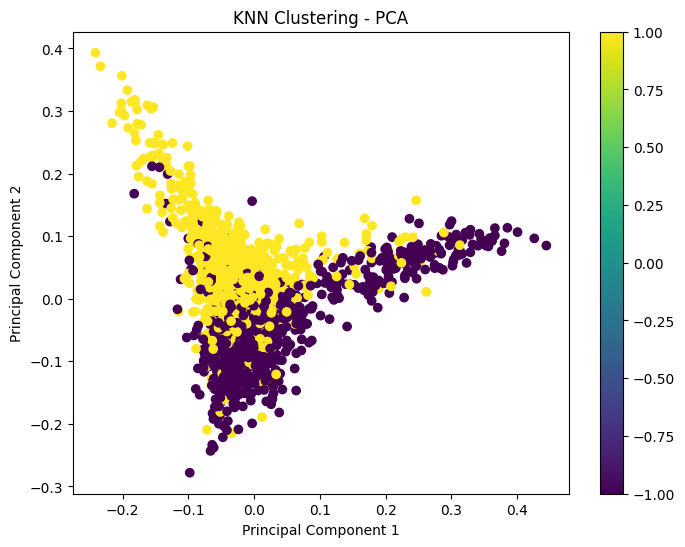

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_num, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Clustering - PCA')
plt.colorbar()
plt.show()